In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [126]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  "font.size": 16,
  "grid.alpha": 0.25})

### Function declarations

In [127]:
def plot_time_series(x, y, xlabel="Time", ylabel="Value", figsize=(10, 4), 
                     use_date_locator=True, title=None):
  fig, ax = plt.subplots(figsize=figsize)

  ax.plot(x, y)

  if use_date_locator:
    formatter = mdates.DateFormatter("%d/%m/%Y")
    # locator = mdates.YearLocator(base=2)
    locator = mdates.MonthLocator(bymonthday=1, bymonth=range(1, 13, 2))
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_locator(locator)
  

  ax.grid("on")
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)

  if title is not None:
    ax.set_title(title)

  if use_date_locator:
    for j, label in enumerate(ax.get_xticklabels()):
      label.set_rotation(40)
      label.set_horizontalalignment('right')

  plt.show(fig)

In [128]:
file_path = "./CDB THN 2021-2024.csv"
df_cdb = pd.read_csv(file_path)
df_cdb["Tgl. Mohon"] = pd.to_datetime(df_cdb["Tgl. Mohon"], format="%d/%m/%Y")
df_cdb

,Tgl. Mohon,Nama,Alamat,Kelurahan,Kecamatan,Gender,Tgl. Lahir,Pekerjaan,Pengeluaran,Pendidikan,Varian Plus
0,2021-01-02,MULKAN,JL AL MAKMUR I,DAMAI,BALIKPAPAN KOTA,LAKI-LAKI,18/08/1996,Wiraswasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTP/SMP,LD0
1,2021-01-02,HANIE ZULFA NABIELA,JL MT HARYONO PERUM GRAND CITY,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,14/04/2003,Pegawai Swasta-Jasa,"< Rp. 900.000,-",AKADEMI/DIPLOMA,LP0
2,2021-01-02,HASANA PUTRI,JL LETJEND S PARMAN,SUMBER REJO,BALIKPAPAN TENGAH,PEREMPUAN,13/02/1997,Pegawai Swasta-Pertanian,"Rp. 900.001,- s/d Rp. 1.250.000,-",SARJANA,LPA
3,2021-01-02,SUSARI HATI,JL MARSMA R ISWAHYUDI,SUNGAINANGKA,BALIKPAPAN SELATAN,PEREMPUAN,16/11/1982,Pegawai Swasta-Industri,"Rp. 4.000.001,- s/d Rp. 6.000.000,-",SLTA/SMU,LP0
4,2021-01-02,ROY KILAPONG,JL MT HARYONO,DAMAI BAHAGIA,BALIKPAPAN SELATAN,LAKI-LAKI,17/01/1976,Pegawai Swasta-Jasa,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,LPA
...,...,...,...,...,...,...,...,...,...,...,...
6852,2024-08-31,RUDI AMSA,JL PADAT KARYA,MANGGAR,BALIKPAPAN TIMUR,LAKI-LAKI,2004-06-11,Pegawai Swasta-Jasa,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,MM0
6853,2024-08-31,MARIATI,JL. TAMAN BUKIT SARI,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,1978-03-21,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,MM0
6854,2024-08-31,JAMES HAROL SELA,JL. LETJEND. S. PARMAN,GUNUNGSARI ULU,BALIKPAPAN TENGAH,LAKI-LAKI,1961-01-19,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SARJANA,LP3
6855,2024-08-31,GOMGOM RAULI SIHOMBING,PERUM BDS II,SUNGAINANGKA,BALIKPAPAN SELATAN,PEREMPUAN,1980-04-30,IBU RUMAH TANGGA,"Rp. 1.250.001,- s/d Rp. 1.750.000,-",SLTA/SMU,ML0


Adding new column of first initial of "Varian Plus"

In [129]:
df_cdb_with_initial = df_cdb.copy()
df_cdb_with_initial["initial Varian Plus"] = df_cdb_with_initial["Varian Plus"].apply(lambda x: x[0])
df_cdb_with_initial

,Tgl. Mohon,Nama,Alamat,Kelurahan,Kecamatan,Gender,Tgl. Lahir,Pekerjaan,Pengeluaran,Pendidikan,Varian Plus,initial Varian Plus
0,2021-01-02,MULKAN,JL AL MAKMUR I,DAMAI,BALIKPAPAN KOTA,LAKI-LAKI,18/08/1996,Wiraswasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTP/SMP,LD0,L
1,2021-01-02,HANIE ZULFA NABIELA,JL MT HARYONO PERUM GRAND CITY,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,14/04/2003,Pegawai Swasta-Jasa,"< Rp. 900.000,-",AKADEMI/DIPLOMA,LP0,L
2,2021-01-02,HASANA PUTRI,JL LETJEND S PARMAN,SUMBER REJO,BALIKPAPAN TENGAH,PEREMPUAN,13/02/1997,Pegawai Swasta-Pertanian,"Rp. 900.001,- s/d Rp. 1.250.000,-",SARJANA,LPA,L
3,2021-01-02,SUSARI HATI,JL MARSMA R ISWAHYUDI,SUNGAINANGKA,BALIKPAPAN SELATAN,PEREMPUAN,16/11/1982,Pegawai Swasta-Industri,"Rp. 4.000.001,- s/d Rp. 6.000.000,-",SLTA/SMU,LP0,L
4,2021-01-02,ROY KILAPONG,JL MT HARYONO,DAMAI BAHAGIA,BALIKPAPAN SELATAN,LAKI-LAKI,17/01/1976,Pegawai Swasta-Jasa,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,LPA,L
...,...,...,...,...,...,...,...,...,...,...,...,...
6852,2024-08-31,RUDI AMSA,JL PADAT KARYA,MANGGAR,BALIKPAPAN TIMUR,LAKI-LAKI,2004-06-11,Pegawai Swasta-Jasa,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,MM0,M
6853,2024-08-31,MARIATI,JL. TAMAN BUKIT SARI,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,1978-03-21,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,MM0,M
6854,2024-08-31,JAMES HAROL SELA,JL. LETJEND. S. PARMAN,GUNUNGSARI ULU,BALIKPAPAN TENGAH,LAKI-LAKI,1961-01-19,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SARJANA,LP3,L
6855,2024-08-31,GOMGOM RAULI SIHOMBING,PERUM BDS II,SUNGAINANGKA,BALIKPAPAN SELATAN,PEREMPUAN,1980-04-30,IBU RUMAH TANGGA,"Rp. 1.250.001,- s/d Rp. 1.750.000,-",SLTA/SMU,ML0,M


Jenis varian

In [130]:
varian_plus_unique = df_cdb["Varian Plus"].unique()
varian_plus_unique

array(['LD0', 'LP0', 'LPA', 'ES5', 'LNA', 'ES4', 'LK0', 'LJ0', 'HZ3',
       'HWC', 'LN0', 'GB3', 'EXF', 'HDN', 'LH0', 'LKA', 'HS2', 'LGC',
       'HT2', 'HWD', 'EW2', 'GF4', 'HW4', 'HY3', 'HS1', 'LE1', 'HT1',
       'JM0', 'LD2', 'HDP', 'EWE', 'LS0', 'LR0', 'HJK', 'EG1', 'ES3',
       'HD7', 'LF1', 'HJ9', 'LFE', 'EYE', 'GD3', 'EWD', 'JMB', 'HZ4',
       'LG1', 'HY4', 'JN0', 'HZA', 'JMC', 'LH1', 'LKC', 'LJ1', 'JS0',
       'LK1', 'ESF', 'ESE', 'EH2', 'LPB', 'LNE', 'LP1', 'LN1', 'JXA',
       'JX0', 'LV0', 'LW0', 'JMA', 'LVA', 'GD4', 'LWA', 'GB4', 'ES6',
       'LZ0', 'LY0', 'GF5', 'JR0', 'JND', 'MA0', 'MB0', 'MDA', 'MC0',
       'MD0', 'LP2', 'LN2', 'LPC', 'LNG', 'EG2', 'LR1', 'LS1', 'JMG',
       'LK2', 'LJ2', 'LH2', 'JMH', 'JM1', 'JMJ', 'LY1', 'LZ1', 'JNT',
       'LVE', 'LV1', 'LW1', 'LN3', 'LPD', 'LP3', 'LNJ', 'MG0', 'MF0',
       'JN1', 'MC1', 'MD1', 'ML0', 'MM0', 'MJ0', 'MK0'], dtype=object)

Jumlah Varian Plus yang unik (jumlah kategori selama 2021-2024)

In [131]:
len(varian_plus_unique)

115

Create a histogram of Varian Plus

In [132]:
df_cdb_varian_plus = df_cdb[["Varian Plus"]].copy()
df_cdb_varian_plus["count"] = 1.
df_cdb_varian_plus = df_cdb_varian_plus.groupby("Varian Plus").agg("count").reset_index()
df_cdb_varian_plus

,Varian Plus,count
0,EG1,1
1,EG2,22
2,EH2,136
3,ES3,10
4,ES4,76
...,...,...
110,MG0,14
111,MJ0,27
112,MK0,14
113,ML0,31


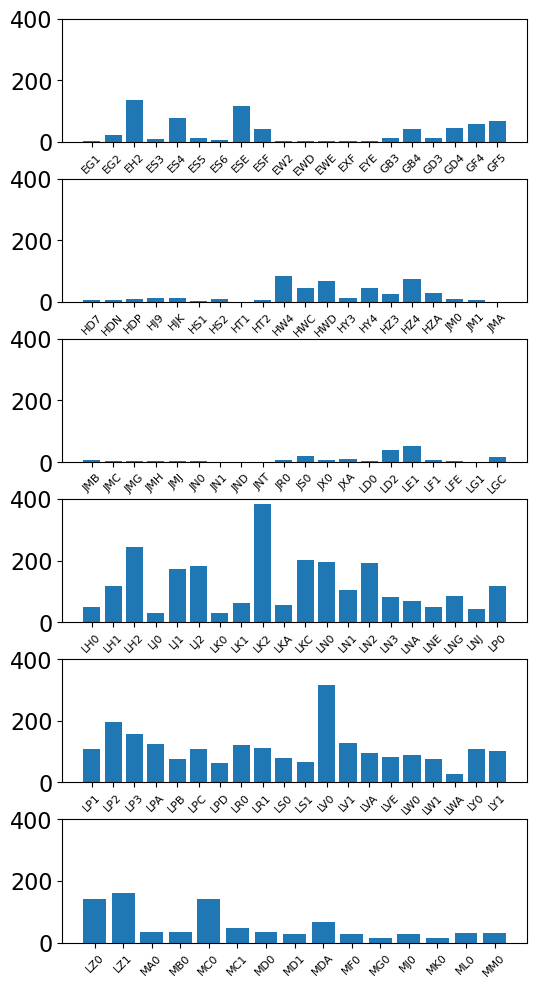

In [133]:
step = 20   # number of category in one subplot

fig, axes = plt.subplots(nrows=len(varian_plus_unique) // step + 1, ncols=1, figsize=(6, 12))

for idx, ax in enumerate(axes):
  idx_start = idx*step
  idx_end = idx*step + step
  
  # because pandas includes right endpoint, we must subtract by one
  x_data = df_cdb_varian_plus.loc[idx_start:idx_end-1, "Varian Plus"]
  y_data = df_cdb_varian_plus.loc[idx_start:idx_end-1, "count"]
  axes[idx].bar(x_data, y_data)

  axes[idx].set_xticks(np.arange(len(varian_plus_unique[idx_start:idx_end])))
  axes[idx].set_xticklabels(x_data, rotation=45, fontsize=8)

  axes[idx].set_ylim([0, 400])

plt.subplots_adjust(hspace=0.3)
plt.show(fig)

Take Varian Plus "LK2"

In [134]:
df_LK2 = df_cdb[df_cdb["Varian Plus"] == "LK2"].copy()
df_LK2

,Tgl. Mohon,Nama,Alamat,Kelurahan,Kecamatan,Gender,Tgl. Lahir,Pekerjaan,Pengeluaran,Pendidikan,Varian Plus
3410,2023-02-17,ZAHROTUN NISA,JL.MARSMA R. ISWAHYUDI,SUNGAINANGKA,BALIKPAPAN SELATAN,PEREMPUAN,12/04/1976,IBU RUMAH TANGGA,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,LK2
3437,2023-02-21,HADIRI,JL MASJID AR RAUDHAH,DAMAI BAHAGIA,BALIKPAPAN SELATAN,LAKI-LAKI,25/03/1973,Wiraswasta-Perdagangan,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,LK2
3447,2023-02-22,JOKO PURWANTO,GRIYA PRIMA LESTARI,GRAHA INDAH,BALIKPAPAN UTARA,LAKI-LAKI,08/03/1979,PEGAWAI NEGERI,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,LK2
3456,2023-02-24,EEN ROSANA,PERUMNAS,BATU AMPAR,BALIKPAPAN UTARA,PEREMPUAN,01/09/1998,Pegawai Swasta-Perdagangan,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTP/SMP,LK2
3467,2023-02-25,RAUDATUL JANNAH,JL. WONOREJO 3,GUNUNGSAMARINDA,BALIKPAPAN UTARA,PEREMPUAN,14/07/1984,Pegawai Swasta-Pertambangan,"Rp. 1.250.001,- s/d Rp. 1.750.000,-",SARJANA,LK2
...,...,...,...,...,...,...,...,...,...,...,...
6398,2024-06-19,MOHAMMAD RIZAL KURNIAWAN,JL. MARKONI DALAM,DAMAI,BALIKPAPAN KOTA,LAKI-LAKI,1996-12-06,Pegawai Swasta-Perdagangan,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,LK2
6419,2024-06-25,RANITI,JL. ASRAMA BUKIT GG 45 GUNUNG SATU,MARGO MULYO,BALIKPAPAN BARAT,PEREMPUAN,1987-11-10,Wiraswasta-Perdagangan,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SD,LK2
6421,2024-06-25,CHRISTIYANTO PURNOMO BROTO,JL MT HARYONO,DAMAI,BALIKPAPAN KOTA,LAKI-LAKI,1978-01-26,Wiraswasta-Jasa,"Rp. 1.250.001,- s/d Rp. 1.750.000,-",SLTA/SMU,LK2
6424,2024-06-26,NOOR CAHAYA NINGRUM,JL TELAGA SARI II,TELAGA SARI,BALIKPAPAN KOTA,PEREMPUAN,2004-03-28,MAHASISWA/PELAJAR,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,LK2


In [135]:
df_LK2_count = df_LK2[["Tgl. Mohon"]].copy()
df_LK2_count["count"] = 1.
df_LK2_count = df_LK2_count.groupby("Tgl. Mohon").agg("count").reset_index()
df_LK2_count

,Tgl. Mohon,count
0,2023-02-17,1
1,2023-02-21,1
2,2023-02-22,1
3,2023-02-24,1
4,2023-02-25,2
...,...,...
220,2024-06-14,2
221,2024-06-19,1
222,2024-06-25,2
223,2024-06-26,1


In [136]:
df_LK2_count["Tgl. Mohon"][0]

Timestamp('2023-02-17 00:00:00')

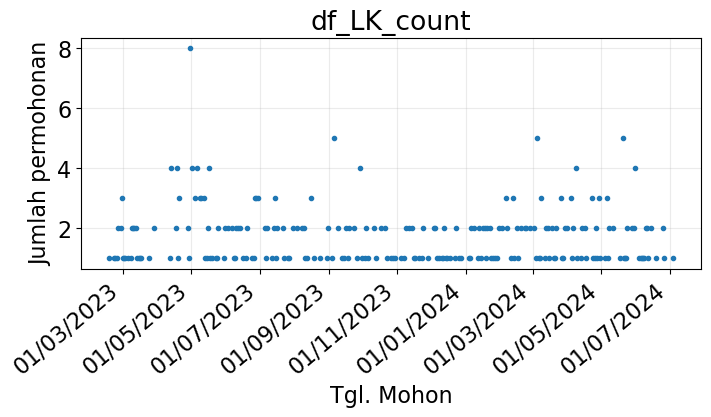

In [137]:
fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(df_LK2_count["Tgl. Mohon"], df_LK2_count["count"], linestyle="None",
        marker=".")

formatter = mdates.DateFormatter("%d/%m/%Y")
# locator = mdates.YearLocator(base=2)
locator = mdates.MonthLocator(bymonthday=1, bymonth=range(1, 13, 2))
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.grid("on")
ax.set_xlabel("Tgl. Mohon")
ax.set_ylabel("Jumlah permohonan")

ax.set_title("df_LK_count")

for j, label in enumerate(ax.get_xticklabels()):
  label.set_rotation(40)
  label.set_horizontalalignment('right')

plt.show(fig)

Jumlah initial Varian PLus

In [138]:
initial_varian_plus_unique = df_cdb_with_initial["initial Varian Plus"].unique()
initial_varian_plus_unique

array(['L', 'E', 'H', 'G', 'J', 'M'], dtype=object)

In [139]:
len(initial_varian_plus_unique)

6

Histogram diagram of initial Varian Plus

In [140]:
df_cdb_initial_varian_plus = df_cdb_with_initial[["initial Varian Plus"]].copy()
df_cdb_initial_varian_plus["count"] = 1.
df_cdb_initial_varian_plus = df_cdb_initial_varian_plus.groupby("initial Varian Plus").agg("count").reset_index()
df_cdb_initial_varian_plus

,initial Varian Plus,count
0,E,426
1,G,237
2,H,447
3,J,84
4,L,5130
5,M,533


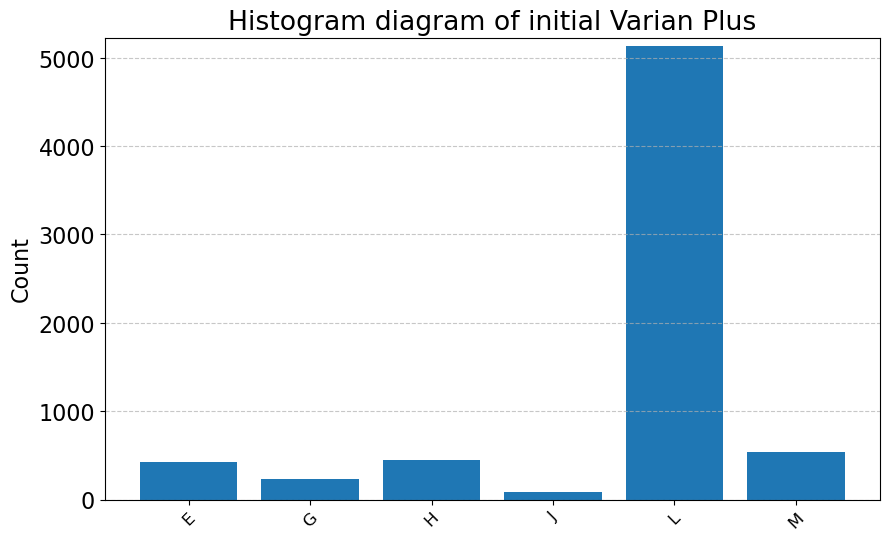

In [141]:
fig, ax = plt.subplots(figsize=(10, 6))

x_data = df_cdb_initial_varian_plus["initial Varian Plus"]
y_data = df_cdb_initial_varian_plus["count"]

ax.bar(x_data, y_data)

ax.set_xticks(np.arange(len(x_data)))
ax.set_xticklabels(x_data, rotation=45, fontsize=12)
ax.set_ylabel("Count")
ax.set_title("Histogram diagram of initial Varian Plus")

ax.set_ylim([0, df_cdb_initial_varian_plus["count"].max() + 100])

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show(fig)


### Time series for each category

In [21]:
df_E = df_cdb_with_initial[df_cdb_with_initial["initial Varian Plus"] == "E"].copy()
df_E_count = df_E[["Tgl. Mohon"]].copy()
df_E_count["count"] = 1.
df_E_count = df_E_count.groupby("Tgl. Mohon").agg("count").reset_index()
df_E_count["cumulative_sum"] = df_E_count["count"].cumsum()

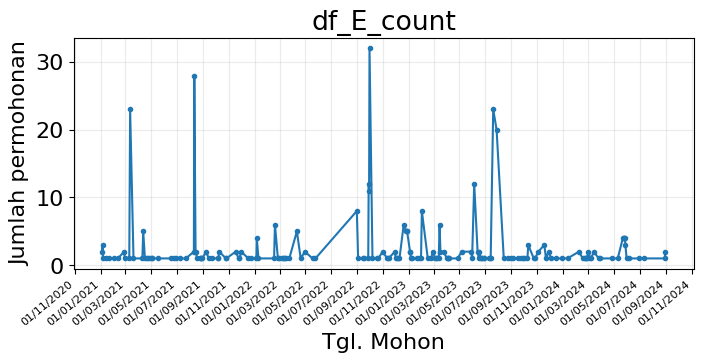

In [22]:
fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(df_E_count["Tgl. Mohon"], df_E_count["count"], 
        linestyle="-", marker=".")

formatter = mdates.DateFormatter("%d/%m/%Y")
# locator = mdates.YearLocator(base=2)
locator = mdates.MonthLocator(bymonthday=1, bymonth=range(1, 13, 2))
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.grid("on")
ax.set_xlabel("Tgl. Mohon")
ax.set_ylabel("Jumlah permohonan")

ax.set_title("df_E_count")

for j, label in enumerate(ax.get_xticklabels()):
  label.set_rotation(40)
  label.set_fontsize(8)
  label.set_horizontalalignment('right')

plt.show(fig)

In [25]:
adfuller(df_E_count["count"])

(-10.786407197274203,
 2.1885322414810893e-19,
 0,
 174,
 {'1%': -3.4685016947910636,
  '5%': -2.8782983668563396,
  '10%': -2.57570415906989},
 911.4443416265717)

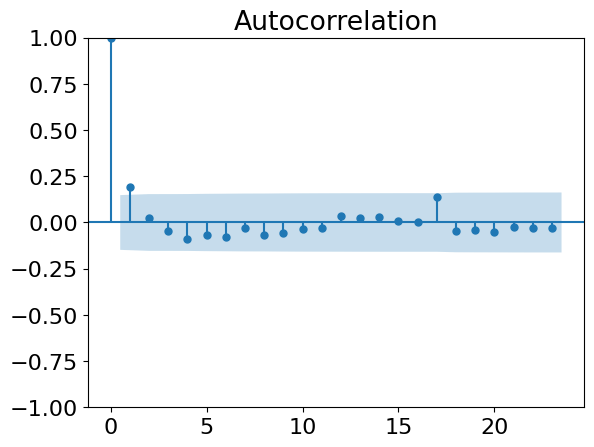

In [35]:
plot_acf(df_E_count["count"]);

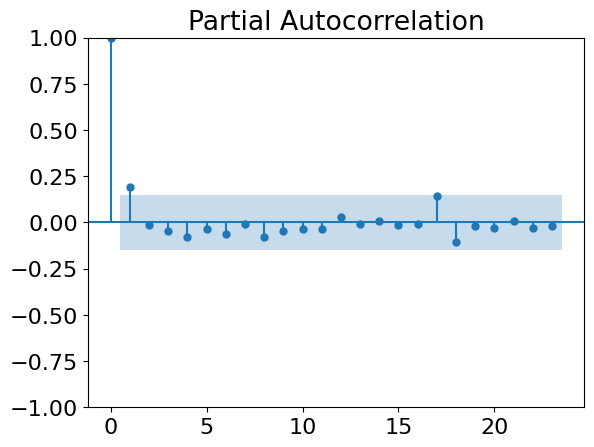

In [36]:
plot_pacf(df_E_count["count"]);

### Plot kumulatif

Take initial varian plus "E"

In [142]:
df_E = df_cdb_with_initial[df_cdb_with_initial["initial Varian Plus"] == "E"].copy()
df_E

,Tgl. Mohon,Nama,Alamat,Kelurahan,Kecamatan,Gender,Tgl. Lahir,Pekerjaan,Pengeluaran,Pendidikan,Varian Plus,initial Varian Plus
5,2021-01-04,DEVRYNALDO RIZAL,JL JEND A YANI,KARANG JATI,BALIKPAPAN TENGAH,LAKI-LAKI,18/12/1978,Pegawai Swasta-Jasa,"> Rp. 6.000.000,-",SARJANA,ES5,E
7,2021-01-04,SUPARYANTO,JL KESATRIA PERUM NUSANTARA LESTARI,GRAHA INDAH,BALIKPAPAN UTARA,NaN,27/08/1976,NaN,NaN,NaN,ES4,E
14,2021-01-06,MULYADI,JL SYARIFUDIN YOES,GUNUNGBAHAGIA,BALIKPAPAN SELATAN,LAKI-LAKI,23/12/1974,Wiraswasta-Konstruksi,"> Rp. 6.000.000,-",SLTA/SMU,ES4,E
15,2021-01-06,MUHAMMAD FADILLAH,JL AL MAKMUR III,DAMAI,BALIKPAPAN KOTA,LAKI-LAKI,07/12/1997,MAHASISWA/PELAJAR,"< Rp. 900.000,-",SLTP/SMP,ES4,E
18,2021-01-06,ANDI WIJAYANTO,JL SUGENG RAWUH II,SEPINGGAN,BALIKPAPAN SELATAN,LAKI-LAKI,06/07/1995,Wiraswasta-Jasa,"Rp. 1.250.001,- s/d Rp. 1.750.000,-",SLTA/SMU,ES5,E
...,...,...,...,...,...,...,...,...,...,...,...,...
6459,2024-06-30,PT KEMILAU INDAH NUSANTARA,JL. POROS SANGATTA-BENGALON KM. 32,MUARA BENGALON,BENGALON,LAKI-LAKI,1985-06-30,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,EG2,E
6523,2024-07-12,PT KEMILAU INDAH NUSANTARA,JL POROS SANGATTA-BENGALON KM 32 SIMPANG RAWA ...,MUARA BENGALON,BENGALON,NaN,2000-11-18,Wiraswasta-Pertambangan,NaN,NaN,EG2,E
6833,2024-08-29,PT KEMILAU INDAH NUSANTARA,JL POROS SANGATTA-BENGGALON KM 32 SIMPANG RAWA...,MUARA BENGALON,BENGALON,NaN,1992-08-27,NaN,NaN,NaN,EG2,E
6841,2024-08-31,LINUS HARIMIN,JL BATU RATNA KM 11,KARANG JOANG,BALIKPAPAN UTARA,LAKI-LAKI,1973-09-23,Pegawai Swasta-Jasa,"Rp. 1.250.001,- s/d Rp. 1.750.000,-",SLTA/SMU,ESF,E


Plot data initial varian plus "E"

In [143]:
df_E_count = df_E[["Tgl. Mohon"]].copy()
df_E_count["count"] = 1.
df_E_count = df_E_count.groupby("Tgl. Mohon").agg("count").reset_index()
df_E_count["cumulative_sum"] = df_E_count["count"].cumsum()
df_E_count

,Tgl. Mohon,count,cumulative_sum
0,2021-01-04,2,2
1,2021-01-06,3,5
2,2021-01-07,1,6
3,2021-01-14,1,7
4,2021-01-21,1,8
...,...,...,...
170,2024-06-05,1,421
171,2024-06-30,1,422
172,2024-07-12,1,423
173,2024-08-29,1,424


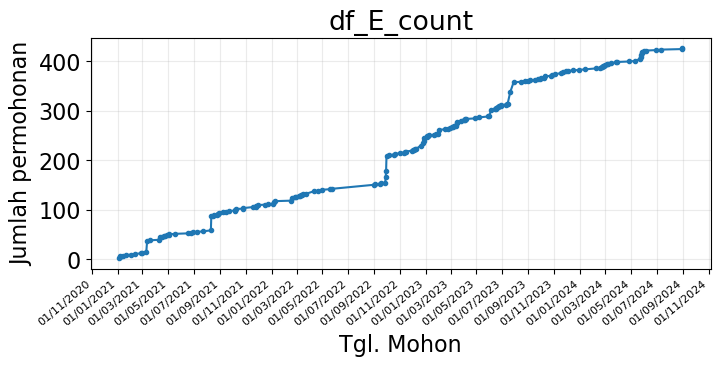

In [144]:
fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(df_E_count["Tgl. Mohon"], df_E_count["cumulative_sum"], 
        linestyle="-", marker=".")

formatter = mdates.DateFormatter("%d/%m/%Y")
# locator = mdates.YearLocator(base=2)
locator = mdates.MonthLocator(bymonthday=1, bymonth=range(1, 13, 2))
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.grid("on")
ax.set_xlabel("Tgl. Mohon")
ax.set_ylabel("Jumlah permohonan")

ax.set_title("df_E_count")

for j, label in enumerate(ax.get_xticklabels()):
  label.set_rotation(40)
  label.set_fontsize(8)
  label.set_horizontalalignment('right')

plt.show(fig)

Take initial varian plus "G"

In [145]:
df_G = df_cdb_with_initial[df_cdb_with_initial["initial Varian Plus"] == "G"].copy()
df_G

,Tgl. Mohon,Nama,Alamat,Kelurahan,Kecamatan,Gender,Tgl. Lahir,Pekerjaan,Pengeluaran,Pendidikan,Varian Plus,initial Varian Plus
22,2021-01-07,SUMINI,BABULU DARAT,BABULU DARAT,BABULU,PEREMPUAN,07/12/1978,Wiraswasta-Perdagangan,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,GB3,G
99,2021-01-27,BUDI,JL PERUM POLDA,GRAHA INDAH,BALIKPAPAN UTARA,LAKI-LAKI,01/02/1974,LAIN-LAIN,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,GF4,G
102,2021-01-28,"SAIPUL HOLIS, SE",JL SYARIFUDDIN YOES,SEPINGGAN BARU,BALIKPAPAN SELATAN,LAKI-LAKI,18/10/1969,Pegawai Swasta-Jasa,"Rp. 4.000.001,- s/d Rp. 6.000.000,-",SARJANA,GF4,G
172,2021-02-22,SULATI,JL BUKIT PELAJAR,BARU TENGAH,BALIKPAPAN BARAT,PEREMPUAN,27/02/1972,Wiraswasta-Perdagangan,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,GB3,G
288,2021-03-23,SARINAH,BULUMINUNG,BULUMINUNG,PENAJAM,PEREMPUAN,01/12/1980,Pegawai Swasta-Pertanian,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTP/SMP,GF4,G
...,...,...,...,...,...,...,...,...,...,...,...,...
6780,2024-08-21,PT JAYACOM PERSADA MANDIRI,JL MT HARYONO,GUNUNG BAHAGIA,BALIKPAPAN SELATAN,LAKI-LAKI,2003-01-01,Wiraswasta-Jasa,"> Rp. 6.000.000,-",SLTA/SMU,GD4,G
6790,2024-08-22,PT. ARKANANTA APTA PRATISTA,JL MT HARYONO,GRAHA INDAH,BALIKPAPAN UTARA,LAKI-LAKI,2006-08-22,Wiraswasta-Jasa,"> Rp. 6.000.000,-",SLTA/SMU,GD4,G
6794,2024-08-23,AGUSWANTO,JL.SULAWESI,KARANG REJO,BALIKPAPAN TENGAH,LAKI-LAKI,1972-08-07,Pegawai Swasta-Jasa,"> Rp. 6.000.000,-",SLTA/SMU,GF5,G
6803,2024-08-24,HENDRA TAMBA,JL KOLONEL SYARIFUDDIN YOES,SEPINGGAN BARU,BALIKPAPAN SELATAN,LAKI-LAKI,1990-05-01,MAHASISWA/PELAJAR,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,GD4,G


In [146]:
df_G_count = df_G[["Tgl. Mohon"]].copy()
df_G_count["count"] = 1.
df_G_count = df_G_count.groupby("Tgl. Mohon").agg("count").reset_index()
df_G_count["cumulative_sum"] = df_G_count["count"].cumsum()
df_G_count

,Tgl. Mohon,count,cumulative_sum
0,2021-01-07,1,1
1,2021-01-27,1,2
2,2021-01-28,1,3
3,2021-02-22,1,4
4,2021-03-23,1,5
...,...,...,...
171,2024-08-21,1,233
172,2024-08-22,1,234
173,2024-08-23,1,235
174,2024-08-24,1,236


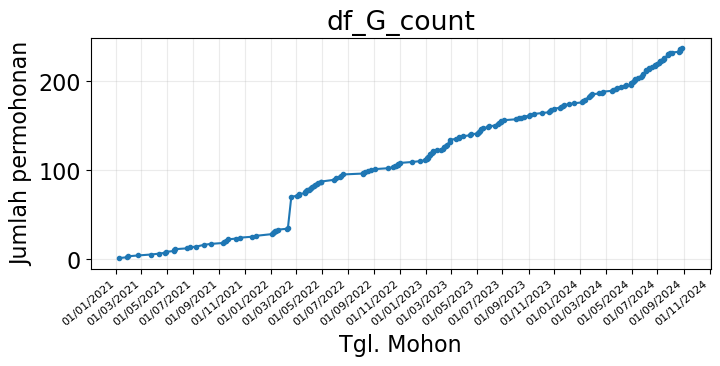

In [147]:
fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(df_G_count["Tgl. Mohon"], df_G_count["cumulative_sum"], 
        linestyle="-", marker=".")

formatter = mdates.DateFormatter("%d/%m/%Y")
# locator = mdates.YearLocator(base=2)
locator = mdates.MonthLocator(bymonthday=1, bymonth=range(1, 13, 2))
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.grid("on")
ax.set_xlabel("Tgl. Mohon")
ax.set_ylabel("Jumlah permohonan")

ax.set_title("df_G_count")

for j, label in enumerate(ax.get_xticklabels()):
  label.set_rotation(40)
  label.set_fontsize(8)
  label.set_horizontalalignment('right')

plt.show(fig)

Take initial varian plus "H"

In [148]:
df_H = df_cdb_with_initial[df_cdb_with_initial["initial Varian Plus"] == "H"].copy()
df_H

,Tgl. Mohon,Nama,Alamat,Kelurahan,Kecamatan,Gender,Tgl. Lahir,Pekerjaan,Pengeluaran,Pendidikan,Varian Plus,initial Varian Plus
12,2021-01-05,JULI HARJANTO,JL BLORA,KLANDASAN ILIR,BALIKPAPAN KOTA,LAKI-LAKI,18/07/1977,Pegawai Swasta-Jasa,"< Rp. 900.000,-",SLTA/SMU,HZ3,H
13,2021-01-06,"DHINA R. AGUSTIANA DA, SE",JL MASJID AR RAUDAH I,GUNUNG BAHAGIA,BALIKPAPAN SELATAN,PEREMPUAN,13/08/1974,IBU RUMAH TANGGA,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SARJANA,HWC,H
24,2021-01-07,AHMAD HABIBI HARAHAP,JL DAKSA TIMUR I,SEPINGGAN,BALIKPAPAN SELATAN,LAKI-LAKI,30/04/1995,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,HDN,H
31,2021-01-07,GALIH PUTRO WICAKSONO,JL JEND SUDIRMAN ASPOL STAL KUDA,DAMAI BAHAGIA,BALIKPAPAN SELATAN,LAKI-LAKI,26/05/1993,TNI/POLRI,"< Rp. 900.000,-",AKADEMI/DIPLOMA,HZ3,H
37,2021-01-09,VELIANA FEBRIANTI,JL GUNUNG GEMBIRA,BARU ILIR,BALIKPAPAN BARAT,PEREMPUAN,25/02/1997,Pegawai Swasta-Perdagangan,"< Rp. 900.000,-",SLTA/SMU,HS2,H
...,...,...,...,...,...,...,...,...,...,...,...,...
5956,2024-04-06,ERNIE DIANA NUR,JL. SIDOMULYO,MARGO MULYO,BALIKPAPAN BARAT,PEREMPUAN,1977-08-14,IBU RUMAH TANGGA,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,HDP,H
6330,2024-06-06,ERNI,JL. WOLTET MONGINSIDI GG. MACAN,BARU ULU,BALIKPAPAN BARAT,PEREMPUAN,1977-07-07,Wiraswasta-Jasa,"Rp. 1.250.001,- s/d Rp. 1.750.000,-",SLTA/SMU,HD7,H
6351,2024-06-10,ZULFIKAR,JL TELINDUNG,BATU AMPAR,BALIKPAPAN UTARA,LAKI-LAKI,1988-07-02,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,HJ9,H
6501,2024-07-08,JOSUA,JL JENDRAL SUDIRMAN,DAMAI,BALIKPAPAN KOTA,LAKI-LAKI,2000-07-22,Pegawai Swasta-Jasa,"Rp. 1.250.001,- s/d Rp. 1.750.000,-",SLTA/SMU,HDN,H


In [149]:
df_H_count = df_H[["Tgl. Mohon"]].copy()
df_H_count["count"] = 1.
df_H_count = df_H_count.groupby("Tgl. Mohon").agg("count").reset_index()
df_H_count["cumulative_sum"] = df_H_count["count"].cumsum()
df_H_count

,Tgl. Mohon,count,cumulative_sum
0,2021-01-05,1,1
1,2021-01-06,1,2
2,2021-01-07,2,4
3,2021-01-09,1,5
4,2021-01-11,1,6
...,...,...,...
295,2024-04-06,1,443
296,2024-06-06,1,444
297,2024-06-10,1,445
298,2024-07-08,1,446


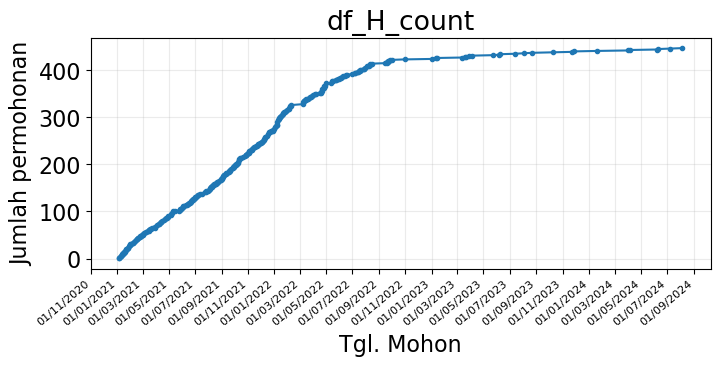

In [150]:
fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(df_H_count["Tgl. Mohon"], df_H_count["cumulative_sum"], 
        linestyle="-", marker=".")

formatter = mdates.DateFormatter("%d/%m/%Y")
# locator = mdates.YearLocator(base=2)
locator = mdates.MonthLocator(bymonthday=1, bymonth=range(1, 13, 2))
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.grid("on")
ax.set_xlabel("Tgl. Mohon")
ax.set_ylabel("Jumlah permohonan")

ax.set_title("df_H_count")

for j, label in enumerate(ax.get_xticklabels()):
  label.set_rotation(40)
  label.set_fontsize(8)
  label.set_horizontalalignment('right')

plt.show(fig)

Take initial varian plus "J"

In [151]:
df_J = df_cdb_with_initial[df_cdb_with_initial["initial Varian Plus"] == "J"].copy()
df_J

,Tgl. Mohon,Nama,Alamat,Kelurahan,Kecamatan,Gender,Tgl. Lahir,Pekerjaan,Pengeluaran,Pendidikan,Varian Plus,initial Varian Plus
150,2021-02-15,INDO ISA,JL SEPAKU LAUT,MARGA SARI,BALIKPAPAN BARAT,PEREMPUAN,10/06/1989,Wiraswasta-Perdagangan,"< Rp. 900.000,-",SLTA/SMU,JM0,J
414,2021-04-26,SENSILIA NONA ANITA,JL SOEKARNO HATTA KM 9,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,10/02/1983,IBU RUMAH TANGGA,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,JMB,J
449,2021-05-05,ZULKHAIDIR,JL.WOLTER MONGINSIDI,BARU ULU,BALIKPAPAN BARAT,LAKI-LAKI,03/08/1975,LAIN-LAIN,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,JMB,J
576,2021-06-11,ABDUL RACHMAN,VILLA DAMAI PERMAI,GUNUNGBAHAGIA,BALIKPAPAN SELATAN,LAKI-LAKI,13/05/1967,Pegawai Swasta-Perdagangan,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,JM0,J
623,2021-06-25,PRESTIYONO,JL MULAWARMAN MANGGAR INDAH,MANGGAR,BALIKPAPAN TIMUR,LAKI-LAKI,15/08/1999,MAHASISWA/PELAJAR,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,JN0,J
...,...,...,...,...,...,...,...,...,...,...,...,...
6073,2024-04-30,AHMAD EKSAN,BALIKPAPAN REGENCY,SEPINGGAN BARU,BALIKPAPAN SELATAN,LAKI-LAKI,1989-08-31,Pegawai Swasta-Jasa,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,JMG,J
6176,2024-05-15,MOHAMMAD RISWAN,JL MAYOR POL ZAINAL ARIFIN,SUMBER REJO,BALIKPAPAN TENGAH,LAKI-LAKI,1995-08-13,Pegawai Swasta-Pertambangan,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,JM1,J
6374,2024-06-12,WATI KASWATI,JL. GIRI REJO II,KARANG JOANG,BALIKPAPAN UTARA,PEREMPUAN,1985-12-21,IBU RUMAH TANGGA,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,JMH,J
6534,2024-07-16,SUGENG PRIYONO,JL PRONA III PERUM BUKIT PRONA INDAH,SEPINGGAN,BALIKPAPAN SELATAN,LAKI-LAKI,1980-02-09,Pegawai Swasta-Jasa,"Rp. 1.250.001,- s/d Rp. 1.750.000,-",SLTA/SMU,JS0,J


In [152]:
df_J_count = df_J[["Tgl. Mohon"]].copy()
df_J_count["count"] = 1.
df_J_count = df_J_count.groupby("Tgl. Mohon").agg("count").reset_index()
df_J_count["cumulative_sum"] = df_J_count["count"].cumsum()
df_J_count

,Tgl. Mohon,count,cumulative_sum
0,2021-02-15,1,1
1,2021-04-26,1,2
2,2021-05-05,1,3
3,2021-06-11,1,4
4,2021-06-25,1,5
...,...,...,...
75,2024-04-30,1,80
76,2024-05-15,1,81
77,2024-06-12,1,82
78,2024-07-16,1,83


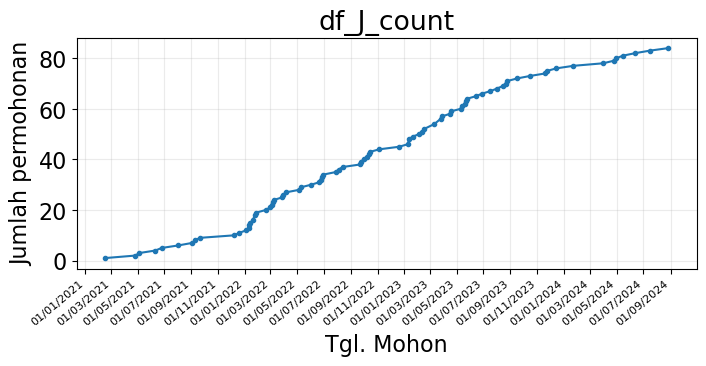

In [153]:
fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(df_J_count["Tgl. Mohon"], df_J_count["cumulative_sum"], 
        linestyle="-", marker=".")

formatter = mdates.DateFormatter("%d/%m/%Y")
# locator = mdates.YearLocator(base=2)
locator = mdates.MonthLocator(bymonthday=1, bymonth=range(1, 13, 2))
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.grid("on")
ax.set_xlabel("Tgl. Mohon")
ax.set_ylabel("Jumlah permohonan")

ax.set_title("df_J_count")

for j, label in enumerate(ax.get_xticklabels()):
  label.set_rotation(40)
  label.set_fontsize(8)
  label.set_horizontalalignment('right')

plt.show(fig)

Take initial varian plus "L"

In [154]:
df_L = df_cdb_with_initial[df_cdb_with_initial["initial Varian Plus"] == "L"].copy()
df_L

,Tgl. Mohon,Nama,Alamat,Kelurahan,Kecamatan,Gender,Tgl. Lahir,Pekerjaan,Pengeluaran,Pendidikan,Varian Plus,initial Varian Plus
0,2021-01-02,MULKAN,JL AL MAKMUR I,DAMAI,BALIKPAPAN KOTA,LAKI-LAKI,18/08/1996,Wiraswasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTP/SMP,LD0,L
1,2021-01-02,HANIE ZULFA NABIELA,JL MT HARYONO PERUM GRAND CITY,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,14/04/2003,Pegawai Swasta-Jasa,"< Rp. 900.000,-",AKADEMI/DIPLOMA,LP0,L
2,2021-01-02,HASANA PUTRI,JL LETJEND S PARMAN,SUMBER REJO,BALIKPAPAN TENGAH,PEREMPUAN,13/02/1997,Pegawai Swasta-Pertanian,"Rp. 900.001,- s/d Rp. 1.250.000,-",SARJANA,LPA,L
3,2021-01-02,SUSARI HATI,JL MARSMA R ISWAHYUDI,SUNGAINANGKA,BALIKPAPAN SELATAN,PEREMPUAN,16/11/1982,Pegawai Swasta-Industri,"Rp. 4.000.001,- s/d Rp. 6.000.000,-",SLTA/SMU,LP0,L
4,2021-01-02,ROY KILAPONG,JL MT HARYONO,DAMAI BAHAGIA,BALIKPAPAN SELATAN,LAKI-LAKI,17/01/1976,Pegawai Swasta-Jasa,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,LPA,L
...,...,...,...,...,...,...,...,...,...,...,...,...
6847,2024-08-31,IMELDA,SUMBER JAYA TIMUR,SEPASO BARAT,BENGALON,PEREMPUAN,2004-07-20,MAHASISWA/PELAJAR,"Rp. 1.250.001,- s/d Rp. 1.750.000,-",SLTA/SMU,LP3,L
6849,2024-08-31,HANIF IHABULLAH IFTIKHAR,JL PENEGAK,DAMAI BAHAGIA,BALIKPAPAN SELATAN,LAKI-LAKI,2005-01-04,MAHASISWA/PELAJAR,"< Rp. 900.000,-",SLTA/SMU,LVE,L
6850,2024-08-31,FAHREL SAJDAH RIFQIYA LEMAN,JL. MARSMA R ISWAHYUDI,SEPINGGAN RAYA,BALIKPAPAN SELATAN,LAKI-LAKI,1973-03-21,Pegawai Swasta-Jasa,"Rp. 1.250.001,- s/d Rp. 1.750.000,-",SLTA/SMU,LV1,L
6854,2024-08-31,JAMES HAROL SELA,JL. LETJEND. S. PARMAN,GUNUNGSARI ULU,BALIKPAPAN TENGAH,LAKI-LAKI,1961-01-19,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SARJANA,LP3,L


In [155]:
df_L_count = df_L[["Tgl. Mohon"]].copy()
df_L_count["count"] = 1.
df_L_count = df_L_count.groupby("Tgl. Mohon").agg("count").reset_index()
df_L_count["cumulative_sum"] = df_L_count["count"].cumsum()
df_L_count

,Tgl. Mohon,count,cumulative_sum
0,2021-01-02,5,5
1,2021-01-04,2,7
2,2021-01-05,3,10
3,2021-01-06,4,14
4,2021-01-07,7,21
...,...,...,...
1064,2024-08-27,2,5118
1065,2024-08-28,1,5119
1066,2024-08-29,3,5122
1067,2024-08-30,2,5124


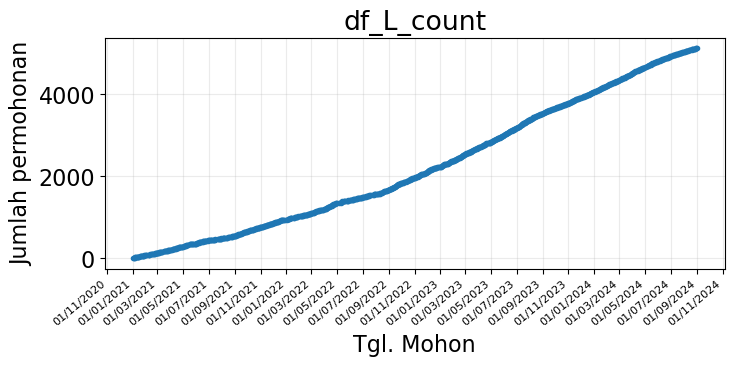

In [156]:
fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(df_L_count["Tgl. Mohon"], df_L_count["cumulative_sum"], 
        linestyle="-", marker=".")

formatter = mdates.DateFormatter("%d/%m/%Y")
# locator = mdates.YearLocator(base=2)
locator = mdates.MonthLocator(bymonthday=1, bymonth=range(1, 13, 2))
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.grid("on")
ax.set_xlabel("Tgl. Mohon")
ax.set_ylabel("Jumlah permohonan")

ax.set_title("df_L_count")

for j, label in enumerate(ax.get_xticklabels()):
  label.set_rotation(40)
  label.set_fontsize(8)
  label.set_horizontalalignment('right')

plt.show(fig)

Take initial varian plus "M"

In [157]:
df_M = df_cdb_with_initial[df_cdb_with_initial["initial Varian Plus"] == "M"].copy()
df_M

,Tgl. Mohon,Nama,Alamat,Kelurahan,Kecamatan,Gender,Tgl. Lahir,Pekerjaan,Pengeluaran,Pendidikan,Varian Plus,initial Varian Plus
2216,2022-07-26,ACHMAD YANI,JL JEND SUDIRMAN,DAMAI,BALIKPAPAN SELATAN,LAKI-LAKI,22/06/1980,Wiraswasta-Perdagangan,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,MA0,M
2262,2022-08-08,NURUL HASANAH,JL. SEPAKU LAUT GANG RUKUN,MARGA SARI,BALIKPAPAN BARAT,PEREMPUAN,02/02/1989,IBU RUMAH TANGGA,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,MB0,M
2267,2022-08-10,HERU BADRUDIN,PERUM GRIYA PERMATA ASRI JL.MC KENZIE,GUNUNGBAHAGIA,BALIKPAPAN SELATAN,LAKI-LAKI,05/03/1988,Pegawai Swasta-Perdagangan,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,MB0,M
2472,2022-09-19,RISWAN FEBRIYANTO BATARA,JL. DAKSA TIMUR XIII,SEPINGGAN,BALIKPAPAN SELATAN,LAKI-LAKI,25/02/1994,Pegawai Swasta-Pertanian,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,MB0,M
2513,2022-09-23,PT HARAPAN UTAMA MAKMUR,JL MT HARYONO,DAMAI,BALIKPAPAN KOTA,NaN,18/07/1979,NaN,NaN,NaN,MB0,M
...,...,...,...,...,...,...,...,...,...,...,...,...
6848,2024-08-31,DODI PRATAMA SUHARSO,BATU AMPAR PERMAL,GRAHA INDAH,BALIKPAPAN UTARA,LAKI-LAKI,1989-03-11,Pegawai Swasta-Jasa,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SARJANA,ML0,M
6851,2024-08-31,SUSAN HADINATA,JL. S. PARMAN,SUMBER REJO,BALIKPAPAN TENGAH,PEREMPUAN,1983-09-20,IBU RUMAH TANGGA,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,MD1,M
6852,2024-08-31,RUDI AMSA,JL PADAT KARYA,MANGGAR,BALIKPAPAN TIMUR,LAKI-LAKI,2004-06-11,Pegawai Swasta-Jasa,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,MM0,M
6853,2024-08-31,MARIATI,JL. TAMAN BUKIT SARI,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,1978-03-21,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,MM0,M


In [158]:
df_M_count = df_M[["Tgl. Mohon"]].copy()
df_M_count["count"] = 1.
df_M_count = df_M_count.groupby("Tgl. Mohon").agg("count").reset_index()
df_M_count["cumulative_sum"] = df_M_count["count"].cumsum()
df_M_count

,Tgl. Mohon,count,cumulative_sum
0,2022-07-26,1,1
1,2022-08-08,1,2
2,2022-08-10,1,3
3,2022-09-19,1,4
4,2022-09-23,2,6
...,...,...,...
283,2024-08-27,2,510
284,2024-08-28,5,515
285,2024-08-29,6,521
286,2024-08-30,3,524


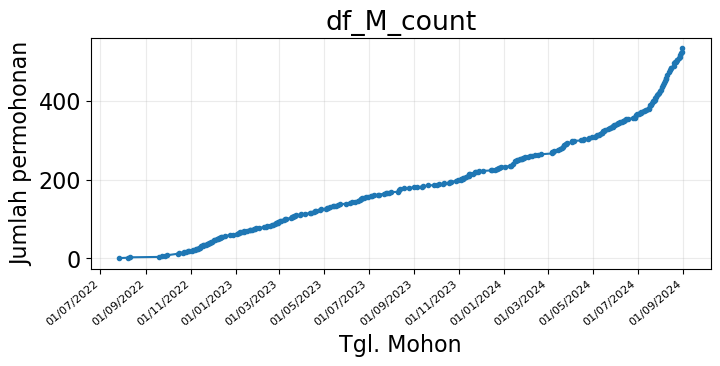

In [159]:
fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(df_M_count["Tgl. Mohon"], df_M_count["cumulative_sum"], 
        linestyle="-", marker=".")

formatter = mdates.DateFormatter("%d/%m/%Y")
# locator = mdates.YearLocator(base=2)
locator = mdates.MonthLocator(bymonthday=1, bymonth=range(1, 13, 2))
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.grid("on")
ax.set_xlabel("Tgl. Mohon")
ax.set_ylabel("Jumlah permohonan")

ax.set_title("df_M_count")

for j, label in enumerate(ax.get_xticklabels()):
  label.set_rotation(40)
  label.set_fontsize(8)
  label.set_horizontalalignment('right')

plt.show(fig)